In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
# Pandas setting
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 100)
# Matplotlib setting
plt.rc('font', family='Malgun Gothic')

<hr>

## 병원정보 Data

In [3]:
# read
hospital_df = pd.read_csv("병원정보_2022.csv", encoding="cp949")
hospital_df

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,주소,전화번호,병원홈페이지,개설일자,총의사수,의과일반의 인원수,의과인턴 인원수,의과레지던트 인원수,의과전문의 인원수,치과일반의 인원수,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,조산사 인원수,좌표(X),좌표(Y)
0,JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIyQzIyQ3OSQyNjE4MzIjNDEjJDEjJDgjJDgz,가톨릭대학교인천성모병원,1,상급종합,220000,인천,220003,인천부평구,부평동,21431,인천광역시 부평구 동수로 56 (부평동),032-1544-9004,http://www.cmcism.or.kr/,19810806.0,328,0,24,72,230,1,0,0,1,0,0,0,0,0,126.724899,37.484831
1,JDQ4MTYyMiM1MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIyQzIyQ4OSQ0NjEwMDIjNDEjJDEjJDgjJDgz,강릉아산병원,1,상급종합,320000,강원,320100,강릉시,NaN,25440,강원도 강릉시 사천면 방동길 38 (),033-610-3114,http://www.gnah.co.kr,19960730.0,206,4,0,36,164,0,0,0,2,0,0,0,0,0,128.857841,37.818433
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIyQzIyQ3OSQ0NjEwMDIjNjEjJDEjJDQjJDgz,강북삼성병원,1,상급종합,110000,서울,110016,종로구,NaN,3181,서울특별시 종로구 새문안로 29 (평동),02-2001-2001,http://www.kbsmc.co.kr,19790324.0,403,4,25,132,235,3,0,0,4,0,0,0,0,0,126.967750,37.568408
3,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIyQzIyQ2MiQyNjE4MzIjNjEjJDEjJDQjJDgz,건국대학교병원,1,상급종합,110000,서울,110023,광진구,NaN,5030,서울특별시 광진구 능동로 120-1 (화양동),1588-1533,http://www.kuh.ac.kr,19821116.0,423,1,37,148,234,0,0,0,3,0,0,0,0,0,127.071828,37.540376
4,JDQ4MTYyMiM4MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIyQzIyQ3OSQyNjEwMDIjNzEjJDEjJDgjJDgz,경북대학교병원,1,상급종합,230000,대구,230006,대구중구,NaN,41944,"대구광역시 중구 동덕로 130 (삼덕동2가, 경북대학교병원)",053-200-5114,http://knumc.knu.ac.kr,19100907.0,475,4,63,191,216,0,0,0,1,0,0,0,0,0,128.604703,35.866253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76244,JDU4MTI3MSM1MSMkMSMkMCMkMTMkNDgxOTYxIzExIyQxIyQzIyQ3OSQzNjE4MzIjNDEjJDEjJDgjJDgz,힘나는한의원,93,한의원,310000,경기,312300,김포시,NaN,10099,경기도 김포시 걸포2로 21 302호 (걸포동),031-997-1750,NaN,20201124.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,126.704889,37.632495
76245,JDQ4MTg4MSM1MSMkMSMkNCMkMTMkNDgxOTYxIzUxIyQxIyQ1IyQ3OSQzNjEwMDIjNzEjJDEjJDgjJDgz,힘내라한의원,93,한의원,110000,서울,110003,강서구,NaN,7526,서울특별시 강서구 화곡로 429 토피아 401호 (가양동),02-6952-8277,NaN,20171213.0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,126.855061,37.561526
76246,JDQ4MTg4MSM1MSMkMSMkNCMkMTMkNDgxMzUxIzUxIyQxIyQ1IyQ4MiQ0NjE0ODEjNDEjJDEjJDQjJDgz,힘찬마디한의원,93,한의원,110000,서울,110002,강동구,천호동,5329,서울특별시 강동구 천호대로 1027 3층 (천호동),02-401-7713,NaN,20121217.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,127.126346,37.538174
76247,JDQ4MTg4MSM1MSMkMSMkNCMkMTMkMzgxNzAyIzUxIyQxIyQ1IyQ3MiQ0NjEwMDIjNjEjJDEjJDQjJDgz,힘찬세상경희한의원,93,한의원,110000,서울,110014,용산구,한강로2가,4376,"서울특별시 용산구 한강대로 109 (한강로2가, 용성비즈텔)",02-793-2080,http://www.himhani.com,20090224.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,126.968167,37.530005


In [4]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76249 entries, 0 to 76248
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   암호화요양기호     76249 non-null  object 
 1   요양기관명       76249 non-null  object 
 2   종별코드        76249 non-null  int64  
 3   종별코드명       76249 non-null  object 
 4   시도코드        76249 non-null  int64  
 5   시도코드명       76249 non-null  object 
 6   시군구코드       76249 non-null  int64  
 7   시군구코드명      76249 non-null  object 
 8   읍면동         27031 non-null  object 
 9   우편번호        76249 non-null  int64  
 10  주소          76249 non-null  object 
 11  전화번호        75877 non-null  object 
 12  병원홈페이지      8835 non-null   object 
 13  개설일자        76224 non-null  float64
 14  총의사수        76249 non-null  int64  
 15  의과일반의 인원수   76249 non-null  int64  
 16  의과인턴 인원수    76249 non-null  int64  
 17  의과레지던트 인원수  76249 non-null  int64  
 18  의과전문의 인원수   76249 non-null  int64  
 19  치과일반의 인원수   76249 non-nul

<hr>

## 병원정보 Data 전처리

In [5]:
hospital_df.sample(3)

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,주소,전화번호,병원홈페이지,개설일자,총의사수,의과일반의 인원수,의과인턴 인원수,의과레지던트 인원수,의과전문의 인원수,치과일반의 인원수,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,조산사 인원수,좌표(X),좌표(Y)
16048,JDQ4MTg4MSM1MSMkMiMkMCMkMDAkNTgxOTYxIzUxIyQxIyQ1IyQ5OSQ0NjEwMDIjNjEjJDEjJDQjJDgz,사랑마을정신건강의학과의원,31,의원,110000,서울,110010,서대문구,남가좌동,3693,"서울특별시 서대문구 모래내로 217 (남가좌동, 우일빌딩)",02-307-9736,NaN,19911231.0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,126.923408,37.574013
2375,JDQ4MTYyMiM4MSMkMSMkMCMkOTkkNTgxMzUxIzIxIyQxIyQ1IyQwMyQzNjE0ODEjNzEjJDEjJDgjJDgz,안심요양병원,28,요양병원,230000,대구,230002,대구동구,NaN,41113,대구광역시 동구 안심로41길 50 (서호동),053-960-1000,NaN,20060207.0,4,0,0,0,3,0,0,0,0,1,0,0,0,0,128.709091,35.870394
42867,JDQ4MTYyMiM1MSMkMSMkMCMkNzIkMzgxOTYxIzUxIyQxIyQ1IyQwMyQyNjEyMjIjNTEjJDEjJDIjJDgz,명성치과의원,51,치과의원,310000,경기,310701,안양만안구,NaN,13969,"경기도 안양시 만안구 안양로 483 2층 (석수동, 지구빌딩)",031-472-2784,NaN,20040603.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,126.909470,37.412589


In [6]:
# 필요 없는 열 제거
hospital_df = hospital_df.drop(['암호화요양기호', '종별코드', '시도코드', '시군구코드', '우편번호', '병원홈페이지'], axis=1)
hospital_df.sample(3)

,요양기관명,종별코드명,시도코드명,시군구코드명,읍면동,주소,전화번호,개설일자,총의사수,의과일반의 인원수,의과인턴 인원수,의과레지던트 인원수,의과전문의 인원수,치과일반의 인원수,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,조산사 인원수,좌표(X),좌표(Y)
66882,바른경희한의원,한의원,서울,서초구,NaN,"서울특별시 서초구 태봉로 70 404호 (우면동, 우면프라자)",02-3463-1275,20140319.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,127.025594,37.464549
60409,오두보건진료소,보건진료소,인천,인천강화군,불은면,인천광역시 강화군 불은면 불은남로 293-1 (불은면),032-937-6813,19840101.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126.511445,37.675832
71059,용한의원,한의원,서울,도봉구,NaN,서울특별시 도봉구 덕릉로 258-1 (창동),02-902-1082,20060519.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,127.040079,37.640397


In [7]:
# 상급종합병원(대학병원급)만 추출
hospital_sangjong_df = hospital_df[(hospital_df['종별코드명'] == '상급종합')]
hospital_sangjong_df.info() # ----- 전국에 45개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   요양기관명       45 non-null     object 
 1   종별코드명       45 non-null     object 
 2   시도코드명       45 non-null     object 
 3   시군구코드명      45 non-null     object 
 4   읍면동         4 non-null      object 
 5   주소          45 non-null     object 
 6   전화번호        44 non-null     object 
 7   개설일자        45 non-null     float64
 8   총의사수        45 non-null     int64  
 9   의과일반의 인원수   45 non-null     int64  
 10  의과인턴 인원수    45 non-null     int64  
 11  의과레지던트 인원수  45 non-null     int64  
 12  의과전문의 인원수   45 non-null     int64  
 13  치과일반의 인원수   45 non-null     int64  
 14  치과인턴 인원수    45 non-null     int64  
 15  치과레지던트 인원수  45 non-null     int64  
 16  치과전문의 인원수   45 non-null     int64  
 17  한방일반의 인원수   45 non-null     int64  
 18  한방인턴 인원수    45 non-null     int64  
 19  한방레지던트 인원수  45 non-null     int

In [8]:
hospital_sangjong_df.groupby('시도코드명')['총의사수'].max()

시도코드명
강원     409
경기     789
경남     444
광주     494
대구     475
대전     488
부산     534
서울    1680
울산     370
인천     513
전남     257
전북     418
충남     343
충북     335
Name: 총의사수, dtype: int64

In [9]:
hospital_sangjong_df.groupby('시도코드명')['총의사수'].mean()

시도코드명
강원    307.500000
경기    518.000000
경남    353.333333
광주    403.000000
대구    367.200000
대전    488.000000
부산    406.666667
서울    774.142857
울산    370.000000
인천    411.666667
전남    257.000000
전북    357.000000
충남    323.500000
충북    335.000000
Name: 총의사수, dtype: float64

<hr>

## 지역별, 연령대별 인구 자료

In [10]:
# read
# ' , ' 제거
popul_df = pd.read_csv("202212_202212_연령별인구현황_연간.csv", thousands=',', encoding="cp949")
popul_df

,행정구역,2022년_계_총인구수,2022년_계_연령구간인구수,2022년_계_0~9세,2022년_계_10~19세,2022년_계_20~29세,2022년_계_30~39세,2022년_계_40~49세,2022년_계_50~59세,2022년_계_60~69세,2022년_계_70~79세,2022년_계_80~89세,2022년_계_90~99세,2022년_계_100세 이상
0,전국 (0000000000),51439038,51439038,3532642,4703196,6417181,6615511,8073117,8612064,7403539,3825717,1970593,277745,7733
1,서울특별시 (1100000000),9428372,9428372,545317,749118,1389483,1425808,1449706,1492802,1297787,713496,321209,42354,1292
2,부산광역시 (2600000000),3317812,3317812,206377,265934,395398,396427,494742,543722,555859,308718,134148,16081,406
3,대구광역시 (2700000000),2363691,2363691,157730,217532,294363,279457,363802,415142,351340,184159,89098,10830,238
4,인천광역시 (2800000000),2967314,2967314,208942,272740,376526,405262,481848,509651,420463,188099,89656,13704,423
5,광주광역시 (2900000000),1431050,1431050,106977,150857,198619,177417,232740,237879,177332,96069,46682,6305,173
6,대전광역시 (3000000000),1446072,1446072,102233,140288,203887,187991,226654,239260,197255,95129,46641,6553,181
7,울산광역시 (3100000000),1110663,1110663,85061,110202,129209,139635,181630,204688,163353,66916,26466,3442,61
8,세종특별자치시 (3600000000),383591,383591,45951,49002,38379,61083,76504,51667,35788,15705,8079,1398,35
9,경기도 (4100000000),13589432,13589432,1040954,1327726,1737291,1882300,2284603,2293422,1750962,808663,403721,58065,1725


In [11]:
popul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   행정구역             18 non-null     object
 1   2022년_계_총인구수     18 non-null     int64 
 2   2022년_계_연령구간인구수  18 non-null     int64 
 3   2022년_계_0~9세     18 non-null     int64 
 4   2022년_계_10~19세   18 non-null     int64 
 5   2022년_계_20~29세   18 non-null     int64 
 6   2022년_계_30~39세   18 non-null     int64 
 7   2022년_계_40~49세   18 non-null     int64 
 8   2022년_계_50~59세   18 non-null     int64 
 9   2022년_계_60~69세   18 non-null     int64 
 10  2022년_계_70~79세   18 non-null     int64 
 11  2022년_계_80~89세   18 non-null     int64 
 12  2022년_계_90~99세   18 non-null     int64 
 13  2022년_계_100세 이상  18 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 2.1+ KB


<hr>

## 지역별, 연령대별 인구 자료 전처리

In [12]:
# column 간소화
popul_df['행정구역'] = popul_df['행정구역'].str.split(expand=True)[0]
popul_df.columns = ['행정구역', '총인구수', '연령구간인구수', '0~9세', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대', '100세이상']
popul_df

,행정구역,총인구수,연령구간인구수,0~9세,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세이상
0,전국,51439038,51439038,3532642,4703196,6417181,6615511,8073117,8612064,7403539,3825717,1970593,277745,7733
1,서울특별시,9428372,9428372,545317,749118,1389483,1425808,1449706,1492802,1297787,713496,321209,42354,1292
2,부산광역시,3317812,3317812,206377,265934,395398,396427,494742,543722,555859,308718,134148,16081,406
3,대구광역시,2363691,2363691,157730,217532,294363,279457,363802,415142,351340,184159,89098,10830,238
4,인천광역시,2967314,2967314,208942,272740,376526,405262,481848,509651,420463,188099,89656,13704,423
5,광주광역시,1431050,1431050,106977,150857,198619,177417,232740,237879,177332,96069,46682,6305,173
6,대전광역시,1446072,1446072,102233,140288,203887,187991,226654,239260,197255,95129,46641,6553,181
7,울산광역시,1110663,1110663,85061,110202,129209,139635,181630,204688,163353,66916,26466,3442,61
8,세종특별자치시,383591,383591,45951,49002,38379,61083,76504,51667,35788,15705,8079,1398,35
9,경기도,13589432,13589432,1040954,1327726,1737291,1882300,2284603,2293422,1750962,808663,403721,58065,1725


In [13]:
# 내용 중복되는 열 삭제
popul_df.drop('연령구간인구수', axis=1)

,행정구역,총인구수,0~9세,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세이상
0,전국,51439038,3532642,4703196,6417181,6615511,8073117,8612064,7403539,3825717,1970593,277745,7733
1,서울특별시,9428372,545317,749118,1389483,1425808,1449706,1492802,1297787,713496,321209,42354,1292
2,부산광역시,3317812,206377,265934,395398,396427,494742,543722,555859,308718,134148,16081,406
3,대구광역시,2363691,157730,217532,294363,279457,363802,415142,351340,184159,89098,10830,238
4,인천광역시,2967314,208942,272740,376526,405262,481848,509651,420463,188099,89656,13704,423
5,광주광역시,1431050,106977,150857,198619,177417,232740,237879,177332,96069,46682,6305,173
6,대전광역시,1446072,102233,140288,203887,187991,226654,239260,197255,95129,46641,6553,181
7,울산광역시,1110663,85061,110202,129209,139635,181630,204688,163353,66916,26466,3442,61
8,세종특별자치시,383591,45951,49002,38379,61083,76504,51667,35788,15705,8079,1398,35
9,경기도,13589432,1040954,1327726,1737291,1882300,2284603,2293422,1750962,808663,403721,58065,1725


In [14]:
# 행정구역 column을 index로
popul_df.set_index('행정구역', inplace = True)
popul_df.index

Index(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='행정구역')

In [15]:
# index 교체후 확인
popul_df

,총인구수,연령구간인구수,0~9세,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세이상
행정구역,,,,,,,,,,,,,
전국,51439038,51439038,3532642,4703196,6417181,6615511,8073117,8612064,7403539,3825717,1970593,277745,7733
서울특별시,9428372,9428372,545317,749118,1389483,1425808,1449706,1492802,1297787,713496,321209,42354,1292
부산광역시,3317812,3317812,206377,265934,395398,396427,494742,543722,555859,308718,134148,16081,406
대구광역시,2363691,2363691,157730,217532,294363,279457,363802,415142,351340,184159,89098,10830,238
인천광역시,2967314,2967314,208942,272740,376526,405262,481848,509651,420463,188099,89656,13704,423
광주광역시,1431050,1431050,106977,150857,198619,177417,232740,237879,177332,96069,46682,6305,173
대전광역시,1446072,1446072,102233,140288,203887,187991,226654,239260,197255,95129,46641,6553,181
울산광역시,1110663,1110663,85061,110202,129209,139635,181630,204688,163353,66916,26466,3442,61
세종특별자치시,383591,383591,45951,49002,38379,61083,76504,51667,35788,15705,8079,1398,35


In [16]:
# 지역별 노인 인구 slicing하기
# 가 목적이었지만 원본 data가 10세 단위로 잘려있어 불가피하게 60세부터로 설정
popul_df.iloc[:, 8:]

,60대,70대,80대,90대,100세이상
행정구역,,,,,
전국,7403539,3825717,1970593,277745,7733
서울특별시,1297787,713496,321209,42354,1292
부산광역시,555859,308718,134148,16081,406
대구광역시,351340,184159,89098,10830,238
인천광역시,420463,188099,89656,13704,423
광주광역시,177332,96069,46682,6305,173
대전광역시,197255,95129,46641,6553,181
울산광역시,163353,66916,26466,3442,61
세종특별자치시,35788,15705,8079,1398,35


In [17]:
# 전국 연령대별 인구수
# 원하는 행, 열 선택 연습
popul_df.iloc[0, 8:]

60대       7403539
70대       3825717
80대       1970593
90대        277745
100세이상       7733
Name: 전국, dtype: int64

In [18]:
# 신규 column 생성
popul_df['노인인구']=0
popul_df.iloc[0:,-1:]

,노인인구
행정구역,
전국,0
서울특별시,0
부산광역시,0
대구광역시,0
인천광역시,0
광주광역시,0
대전광역시,0
울산광역시,0
세종특별자치시,0


In [19]:
# DataFrame에 잘 들어갔는지 확인 및 위치(-1) 체크
popul_df

,총인구수,연령구간인구수,0~9세,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세이상,노인인구
행정구역,,,,,,,,,,,,,,
전국,51439038,51439038,3532642,4703196,6417181,6615511,8073117,8612064,7403539,3825717,1970593,277745,7733,0
서울특별시,9428372,9428372,545317,749118,1389483,1425808,1449706,1492802,1297787,713496,321209,42354,1292,0
부산광역시,3317812,3317812,206377,265934,395398,396427,494742,543722,555859,308718,134148,16081,406,0
대구광역시,2363691,2363691,157730,217532,294363,279457,363802,415142,351340,184159,89098,10830,238,0
인천광역시,2967314,2967314,208942,272740,376526,405262,481848,509651,420463,188099,89656,13704,423,0
광주광역시,1431050,1431050,106977,150857,198619,177417,232740,237879,177332,96069,46682,6305,173,0
대전광역시,1446072,1446072,102233,140288,203887,187991,226654,239260,197255,95129,46641,6553,181,0
울산광역시,1110663,1110663,85061,110202,129209,139635,181630,204688,163353,66916,26466,3442,61,0
세종특별자치시,383591,383591,45951,49002,38379,61083,76504,51667,35788,15705,8079,1398,35,0


In [20]:
# for문으로 각 index별 노인인구 계산하고 집어넣기
for i in range(0, 18):
    popul_df.iloc[i:i+1, -1:] = popul_df.iloc[i, 8:-1].sum()

In [21]:
# 확인
popul_df

,총인구수,연령구간인구수,0~9세,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세이상,노인인구
행정구역,,,,,,,,,,,,,,
전국,51439038,51439038,3532642,4703196,6417181,6615511,8073117,8612064,7403539,3825717,1970593,277745,7733,13485327
서울특별시,9428372,9428372,545317,749118,1389483,1425808,1449706,1492802,1297787,713496,321209,42354,1292,2376138
부산광역시,3317812,3317812,206377,265934,395398,396427,494742,543722,555859,308718,134148,16081,406,1015212
대구광역시,2363691,2363691,157730,217532,294363,279457,363802,415142,351340,184159,89098,10830,238,635665
인천광역시,2967314,2967314,208942,272740,376526,405262,481848,509651,420463,188099,89656,13704,423,712345
광주광역시,1431050,1431050,106977,150857,198619,177417,232740,237879,177332,96069,46682,6305,173,326561
대전광역시,1446072,1446072,102233,140288,203887,187991,226654,239260,197255,95129,46641,6553,181,345759
울산광역시,1110663,1110663,85061,110202,129209,139635,181630,204688,163353,66916,26466,3442,61,260238
세종특별자치시,383591,383591,45951,49002,38379,61083,76504,51667,35788,15705,8079,1398,35,61005


In [22]:
# 신규 column 생성
popul_df['노인인구비']=0
popul_df.iloc[0:,-1:]

,노인인구비
행정구역,
전국,0
서울특별시,0
부산광역시,0
대구광역시,0
인천광역시,0
광주광역시,0
대전광역시,0
울산광역시,0
세종특별자치시,0


In [23]:
popul_df

,총인구수,연령구간인구수,0~9세,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세이상,노인인구,노인인구비
행정구역,,,,,,,,,,,,,,,
전국,51439038,51439038,3532642,4703196,6417181,6615511,8073117,8612064,7403539,3825717,1970593,277745,7733,13485327,0
서울특별시,9428372,9428372,545317,749118,1389483,1425808,1449706,1492802,1297787,713496,321209,42354,1292,2376138,0
부산광역시,3317812,3317812,206377,265934,395398,396427,494742,543722,555859,308718,134148,16081,406,1015212,0
대구광역시,2363691,2363691,157730,217532,294363,279457,363802,415142,351340,184159,89098,10830,238,635665,0
인천광역시,2967314,2967314,208942,272740,376526,405262,481848,509651,420463,188099,89656,13704,423,712345,0
광주광역시,1431050,1431050,106977,150857,198619,177417,232740,237879,177332,96069,46682,6305,173,326561,0
대전광역시,1446072,1446072,102233,140288,203887,187991,226654,239260,197255,95129,46641,6553,181,345759,0
울산광역시,1110663,1110663,85061,110202,129209,139635,181630,204688,163353,66916,26466,3442,61,260238,0
세종특별자치시,383591,383591,45951,49002,38379,61083,76504,51667,35788,15705,8079,1398,35,61005,0


In [24]:
# 총인구수 대비 노인인구비율 백분위 샘플
popul_df.iloc[0,-2]/popul_df.iloc[0,0]*100

26.216133746513687

In [25]:
# for문으로 각 index별 노인인구비율 계산하고 집어넣기
for i in range(0, 18):
    popul_df.iloc[i:i+1, -1:] = popul_df.iloc[i,-2]/popul_df.iloc[i,0]*100

In [26]:
popul_df

,총인구수,연령구간인구수,0~9세,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세이상,노인인구,노인인구비
행정구역,,,,,,,,,,,,,,,
전국,51439038,51439038,3532642,4703196,6417181,6615511,8073117,8612064,7403539,3825717,1970593,277745,7733,13485327,26.216134
서울특별시,9428372,9428372,545317,749118,1389483,1425808,1449706,1492802,1297787,713496,321209,42354,1292,2376138,25.201997
부산광역시,3317812,3317812,206377,265934,395398,396427,494742,543722,555859,308718,134148,16081,406,1015212,30.598840
대구광역시,2363691,2363691,157730,217532,294363,279457,363802,415142,351340,184159,89098,10830,238,635665,26.892898
인천광역시,2967314,2967314,208942,272740,376526,405262,481848,509651,420463,188099,89656,13704,423,712345,24.006391
광주광역시,1431050,1431050,106977,150857,198619,177417,232740,237879,177332,96069,46682,6305,173,326561,22.819678
대전광역시,1446072,1446072,102233,140288,203887,187991,226654,239260,197255,95129,46641,6553,181,345759,23.910220
울산광역시,1110663,1110663,85061,110202,129209,139635,181630,204688,163353,66916,26466,3442,61,260238,23.430870
세종특별자치시,383591,383591,45951,49002,38379,61083,76504,51667,35788,15705,8079,1398,35,61005,15.903658


<hr>

## 전처리한 데이터 시각화

<AxesSubplot:xlabel='행정구역', ylabel='노인인구'>

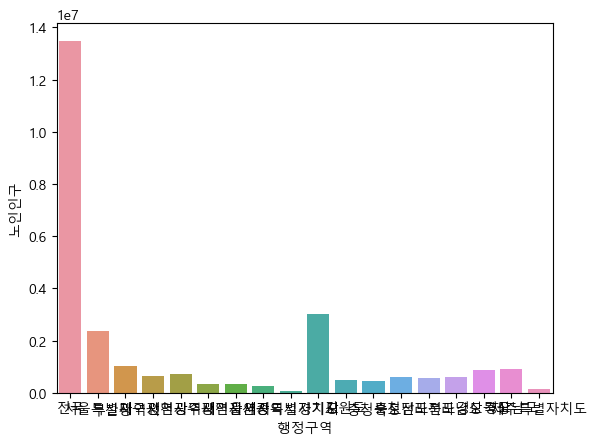

In [27]:
sns.barplot(data=popul_df, x=popul_df.index, y='노인인구')

In [28]:
# 전국 총합 data가 너무 커서 지역별 차이가 안보임
# '전국'행을 제거한 신규 DataFrame 생성
popul_per_city_df = popul_df.drop(['전국'], axis=0)
popul_per_city_df

,총인구수,연령구간인구수,0~9세,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세이상,노인인구,노인인구비
행정구역,,,,,,,,,,,,,,,
서울특별시,9428372,9428372,545317,749118,1389483,1425808,1449706,1492802,1297787,713496,321209,42354,1292,2376138,25.201997
부산광역시,3317812,3317812,206377,265934,395398,396427,494742,543722,555859,308718,134148,16081,406,1015212,30.598840
대구광역시,2363691,2363691,157730,217532,294363,279457,363802,415142,351340,184159,89098,10830,238,635665,26.892898
인천광역시,2967314,2967314,208942,272740,376526,405262,481848,509651,420463,188099,89656,13704,423,712345,24.006391
광주광역시,1431050,1431050,106977,150857,198619,177417,232740,237879,177332,96069,46682,6305,173,326561,22.819678
대전광역시,1446072,1446072,102233,140288,203887,187991,226654,239260,197255,95129,46641,6553,181,345759,23.910220
울산광역시,1110663,1110663,85061,110202,129209,139635,181630,204688,163353,66916,26466,3442,61,260238,23.430870
세종특별자치시,383591,383591,45951,49002,38379,61083,76504,51667,35788,15705,8079,1398,35,61005,15.903658
경기도,13589432,13589432,1040954,1327726,1737291,1882300,2284603,2293422,1750962,808663,403721,58065,1725,3023136,22.246228


<AxesSubplot:xlabel='행정구역', ylabel='노인인구'>

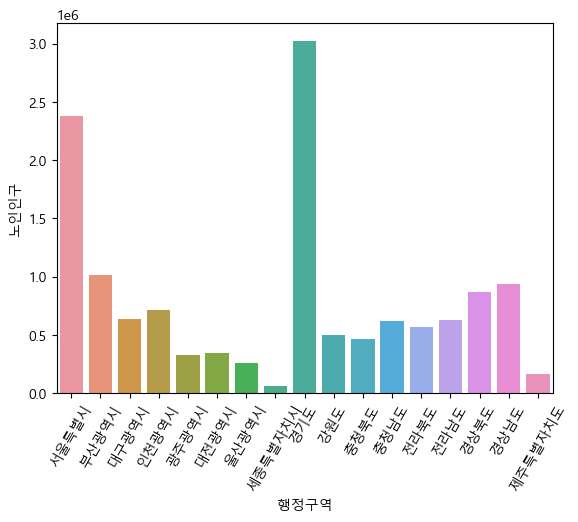

In [29]:
# 지역별 노인인구수
plt.xticks(rotation=60)
sns.barplot(data=popul_per_city_df, x=popul_per_city_df.index, y='노인인구')

<AxesSubplot:xlabel='행정구역', ylabel='노인인구비'>

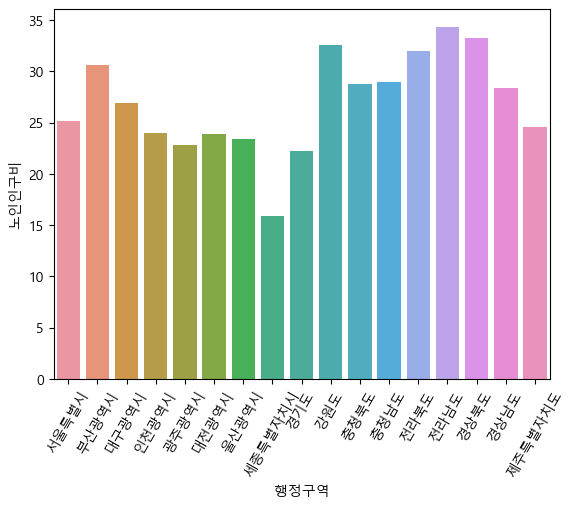

In [30]:
# 전체인구대비 노인인구 비율
plt.xticks(rotation=60)
sns.barplot(data=popul_per_city_df, x=popul_per_city_df.index, y='노인인구비')

In [31]:
# map
m = folium.Map([36.5, 128], zoom_start=7.5)

In [32]:
for n in hospital_sangjong_df.index:
    lat=hospital_sangjong_df.loc[n,'좌표(Y)']
    long=hospital_sangjong_df.loc[n,'좌표(X)']
    tooltip = hospital_sangjong_df.loc[n, '주소']+' '+hospital_sangjong_df.loc[n, '요양기관명']
    folium.Marker([lat, long], tooltip=tooltip).add_to(m)
m

<AxesSubplot:xlabel='시도코드명'>

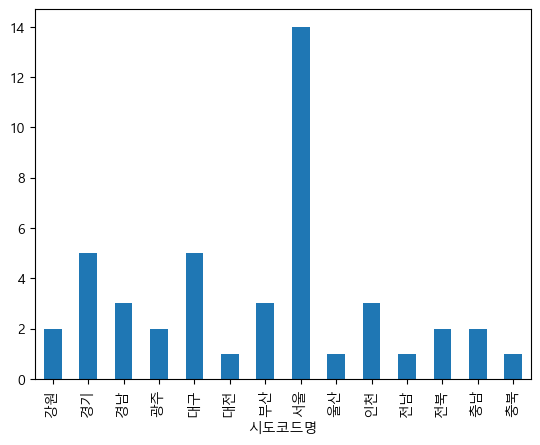

In [33]:
hospital_sangjong_df.groupby('시도코드명')['총의사수'].count().plot.bar()

In [34]:
# DataFrame간 지역 명이 다르므로 통일시키기 위해 다시 전처리
hospital_sangjong_df['시도코드명'].value_counts() # ----- 이것을 하나의 DataFrame으로 간주하여 새로 만들 예정

서울    14
대구     5
경기     5
인천     3
경남     3
부산     3
강원     2
충남     2
전북     2
광주     2
대전     1
충북     1
울산     1
전남     1
Name: 시도코드명, dtype: int64

In [35]:
hospital_sangjong_df['시도코드명'].value_counts().index

Index(['서울', '대구', '경기', '인천', '경남', '부산', '강원', '충남', '전북', '광주', '대전', '충북',
       '울산', '전남'],
      dtype='object')

In [36]:
hospital_sangjong_df['시도코드명'].value_counts().values

array([14,  5,  5,  3,  3,  3,  2,  2,  2,  2,  1,  1,  1,  1],
      dtype=int64)

In [37]:
# 합칠 DataFrame의 인덱스 확인
popul_per_city_df.index

Index(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='행정구역')

In [38]:
# 신규 DataFrame 생성
hospital_sangjong_sido_df = pd.DataFrame(hospital_sangjong_df['시도코드명'].value_counts())

In [39]:
# 확인
hospital_sangjong_sido_df

,시도코드명
서울,14
대구,5
경기,5
인천,3
경남,3
부산,3
강원,2
충남,2
전북,2
광주,2


In [40]:
# 위에서 확인한 칼럼명과 동일하게 바꿈
new_sido_df = hospital_sangjong_sido_df.rename(columns={'시도코드명':'상급종합병원수'}, index={'서울':'서울특별시', '대구':'대구광역시', '경기':'경기도', '인천':'인천광역시', 
                                                                     '경남':'경상남도', '부산':'부산광역시', '강원':'강원도', '충남':'충청남도', '전북':'전라북도', '광주':'광주광역시', '대전':'대전광역시', '충북':'충청북도', '울산':'울산광역시', '전남':'전라남도'})   

In [41]:
# 확인
new_sido_df

,상급종합병원수
서울특별시,14
대구광역시,5
경기도,5
인천광역시,3
경상남도,3
부산광역시,3
강원도,2
충청남도,2
전라북도,2
광주광역시,2


In [42]:
# 인구수 DataFrame에는 존재하지만 병원정보 DataFrame에는 존재하지 않는 칼럼 추가
# 상급종합병원이 없다는 뜻이므로 value = 0
new_sido_df.loc['제주특별자치도'] = 0
new_sido_df.loc['세종특별자치시'] = 0
new_sido_df.loc['경상북도'] = 0

In [43]:
new_sido_df

,상급종합병원수
서울특별시,14
대구광역시,5
경기도,5
인천광역시,3
경상남도,3
부산광역시,3
강원도,2
충청남도,2
전라북도,2
광주광역시,2


In [44]:
# 기존 인구 자료 확인
popul_per_city_df

,총인구수,연령구간인구수,0~9세,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세이상,노인인구,노인인구비
행정구역,,,,,,,,,,,,,,,
서울특별시,9428372,9428372,545317,749118,1389483,1425808,1449706,1492802,1297787,713496,321209,42354,1292,2376138,25.201997
부산광역시,3317812,3317812,206377,265934,395398,396427,494742,543722,555859,308718,134148,16081,406,1015212,30.598840
대구광역시,2363691,2363691,157730,217532,294363,279457,363802,415142,351340,184159,89098,10830,238,635665,26.892898
인천광역시,2967314,2967314,208942,272740,376526,405262,481848,509651,420463,188099,89656,13704,423,712345,24.006391
광주광역시,1431050,1431050,106977,150857,198619,177417,232740,237879,177332,96069,46682,6305,173,326561,22.819678
대전광역시,1446072,1446072,102233,140288,203887,187991,226654,239260,197255,95129,46641,6553,181,345759,23.910220
울산광역시,1110663,1110663,85061,110202,129209,139635,181630,204688,163353,66916,26466,3442,61,260238,23.430870
세종특별자치시,383591,383591,45951,49002,38379,61083,76504,51667,35788,15705,8079,1398,35,61005,15.903658
경기도,13589432,13589432,1040954,1327726,1737291,1882300,2284603,2293422,1750962,808663,403721,58065,1725,3023136,22.246228


In [45]:
# 병원정보, 인구정보 DataFrame 합치기
final_df = pd.concat([popul_per_city_df, new_sido_df], axis=1)

In [46]:
# 확인
final_df

,총인구수,연령구간인구수,0~9세,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세이상,노인인구,노인인구비,상급종합병원수
서울특별시,9428372,9428372,545317,749118,1389483,1425808,1449706,1492802,1297787,713496,321209,42354,1292,2376138,25.201997,14
부산광역시,3317812,3317812,206377,265934,395398,396427,494742,543722,555859,308718,134148,16081,406,1015212,30.598840,3
대구광역시,2363691,2363691,157730,217532,294363,279457,363802,415142,351340,184159,89098,10830,238,635665,26.892898,5
인천광역시,2967314,2967314,208942,272740,376526,405262,481848,509651,420463,188099,89656,13704,423,712345,24.006391,3
광주광역시,1431050,1431050,106977,150857,198619,177417,232740,237879,177332,96069,46682,6305,173,326561,22.819678,2
대전광역시,1446072,1446072,102233,140288,203887,187991,226654,239260,197255,95129,46641,6553,181,345759,23.910220,1
울산광역시,1110663,1110663,85061,110202,129209,139635,181630,204688,163353,66916,26466,3442,61,260238,23.430870,1
세종특별자치시,383591,383591,45951,49002,38379,61083,76504,51667,35788,15705,8079,1398,35,61005,15.903658,0
경기도,13589432,13589432,1040954,1327726,1737291,1882300,2284603,2293422,1750962,808663,403721,58065,1725,3023136,22.246228,5
강원도,1536498,1536498,96036,132133,170194,160365,215872,262025,267950,138112,81500,11974,337,499873,32.533267,2


<hr>

## 통합된 DataFrame 시각화

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='노인인구비', ylabel='Density'>

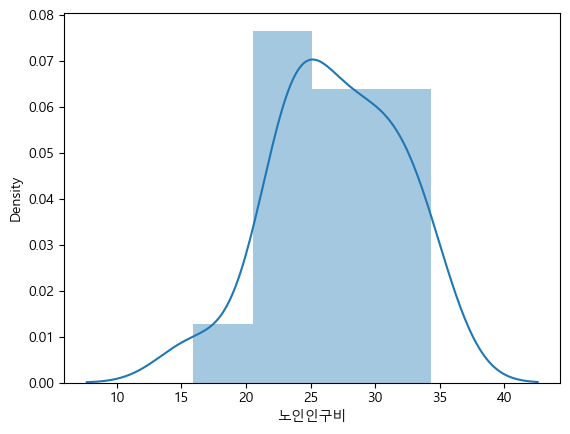

In [47]:
sns.distplot(final_df['노인인구비'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='상급종합병원수', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


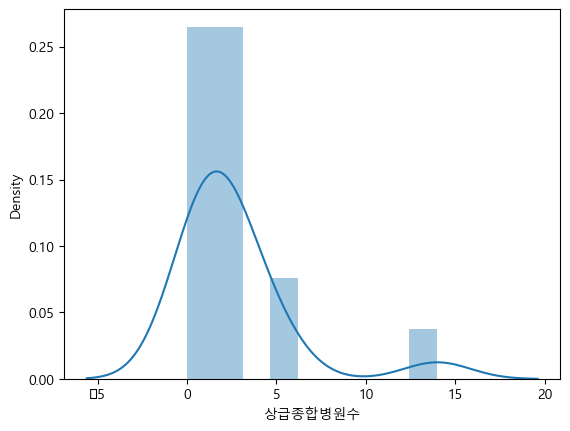

In [48]:
sns.distplot(final_df['상급종합병원수'])

<AxesSubplot:ylabel='상급종합병원수'>

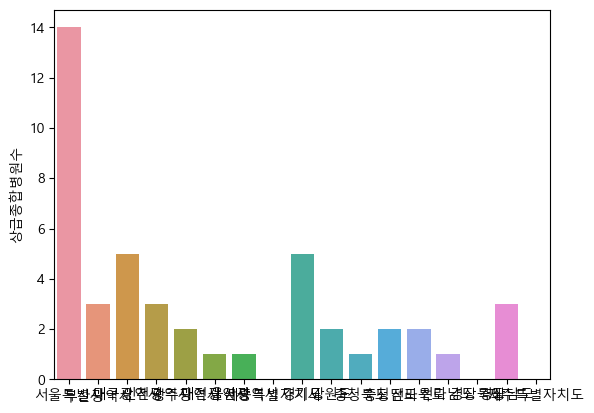

In [49]:
sns.barplot(x=final_df.index, y=final_df['상급종합병원수'])

<AxesSubplot:ylabel='상급종합병원수'>

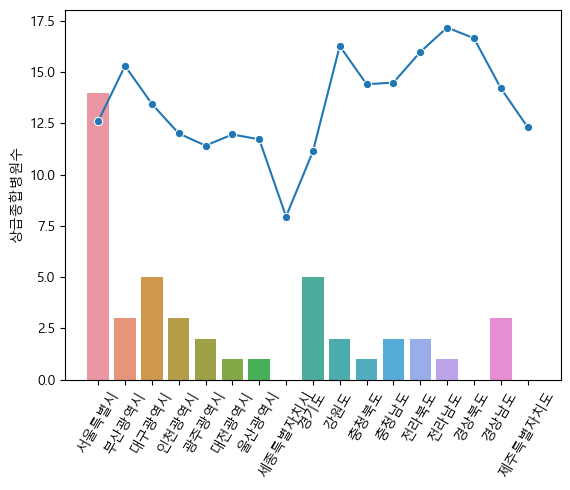

In [50]:
plt.xticks(rotation=60)
sns.barplot(x=final_df.index, y=final_df['상급종합병원수'])
sns.lineplot(x=final_df.index, y=final_df['노인인구비']/2, marker='o')